In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply
import seaborn as sns


In [85]:
#1. Define the Objective
# This project aims to find out which employees should be promoted to manager roles or below.
# We use past performance, training scores, KPI results, and other employee details to make predictions.
# The goal is to identify the right employees early—before final evaluations.
# This helps the company speed up promotions and plan better across all 9 departments.


In [86]:
#2. Data Collection


In [87]:
df = pd.read_csv('Documents/train.csv')
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [88]:
#3. Data Cleaning (Preprocessing)

In [89]:
#Steps to Check for Imbalance
df['is_promoted'].value_counts(normalize=True)


is_promoted
0    0.91483
1    0.08517
Name: proportion, dtype: float64

In [90]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [91]:
df.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [92]:
#Step 1: Handle Missing Values
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [93]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [94]:
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['education']

0        Master's & above
1              Bachelor's
2              Bachelor's
3              Bachelor's
4              Bachelor's
               ...       
54803          Bachelor's
54804    Master's & above
54805          Bachelor's
54806          Bachelor's
54807          Bachelor's
Name: education, Length: 54808, dtype: object

In [95]:
df['previous_year_rating'] = df['previous_year_rating'].fillna(0.0)  # Replace missing 'previous_year_rating' values with 0.0
df['previous_year_rating']
                                                                    

0        5.0
1        5.0
2        3.0
3        1.0
4        3.0
        ... 
54803    3.0
54804    2.0
54805    5.0
54806    1.0
54807    1.0
Name: previous_year_rating, Length: 54808, dtype: float64

In [96]:
#Step 2: Remove Duplicates
df.duplicated().sum()

np.int64(0)

In [97]:
#Step 3: Correct Inconsistent Formats   (Correct inconsistent formats (e.g., dates, strings) how i do using this data)

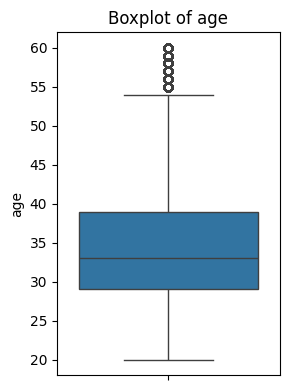

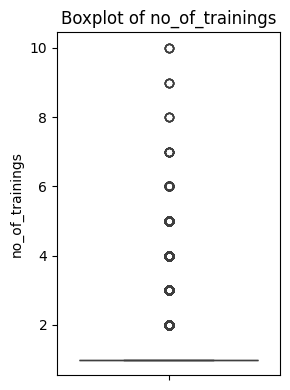

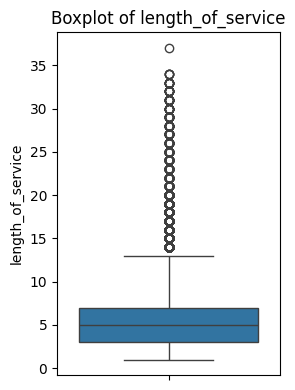

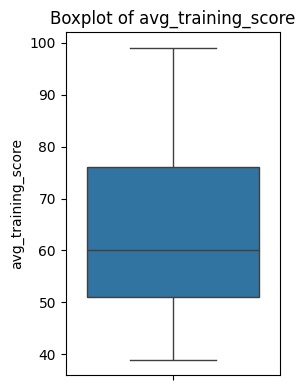

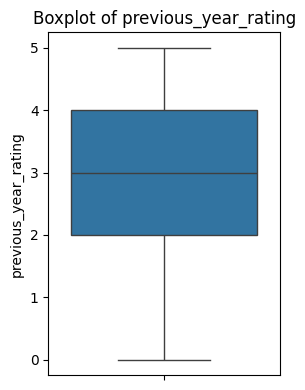

In [98]:
#Step 4: Handle Outliers

import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['age', 'no_of_trainings', 'length_of_service', 'avg_training_score', 'previous_year_rating']

for col in numeric_cols:
    plt.figure(figsize=(3, 4))  # Adjust figure size for vertical
    sns.boxplot(data=df, y=col)  # Use y instead of x
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


In [99]:
#Step 5: Convert Data Types

In [100]:
#Step 6: Rename Columns
df.rename(columns={
    'KPIs_met >80%': 'kpis_above_80',
    'awards_won?': 'awards_won'
}, inplace=True)

In [101]:
#4. Data Exploration (EDA – Exploratory Data Analysis)

In [102]:
#Step 1: Understand the Structure

df.shape 

(54808, 14)

In [103]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'kpis_above_80', 'awards_won',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  kpis_above_80         54808 non-null  int64  
 11  awards_won            54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [105]:
df.ndim

2

In [106]:
df.size

767312

In [107]:
#Step 2: Summary Statistics
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,kpis_above_80,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.078748,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.496458,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,0.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,2.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [108]:
#Step 3: Missing Values
df.isnull().sum()          # Count missing values per column

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
kpis_above_80           0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

In [109]:
#Step 4: Unique Values
df.nunique() 

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        6
length_of_service          35
kpis_above_80               2
awards_won                  2
avg_training_score         61
is_promoted                 2
dtype: int64

In [110]:
df['education'].value_counts()

education
Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_8848\887871456.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='department', y='is_promoted', data=df, palette='viridis')


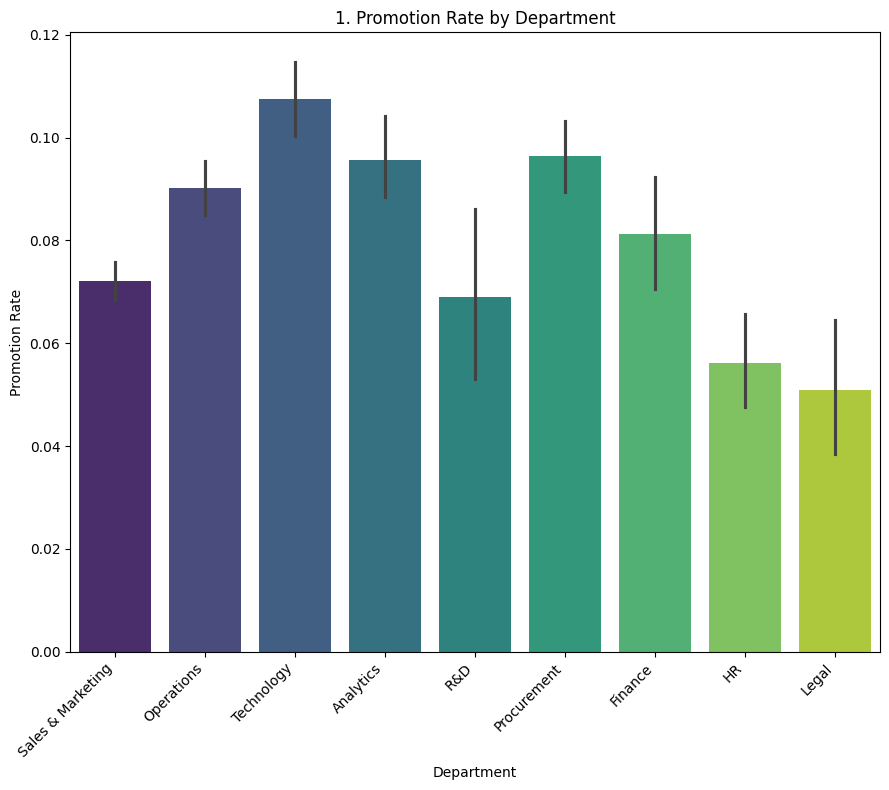

In [111]:
# Chart 1: Promotion Rate by Department

plt.figure(figsize=(9, 8))
sns.barplot(x='department', y='is_promoted', data=df, palette='viridis')
plt.title('1. Promotion Rate by Department')
plt.xlabel('Department')
plt.ylabel('Promotion Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

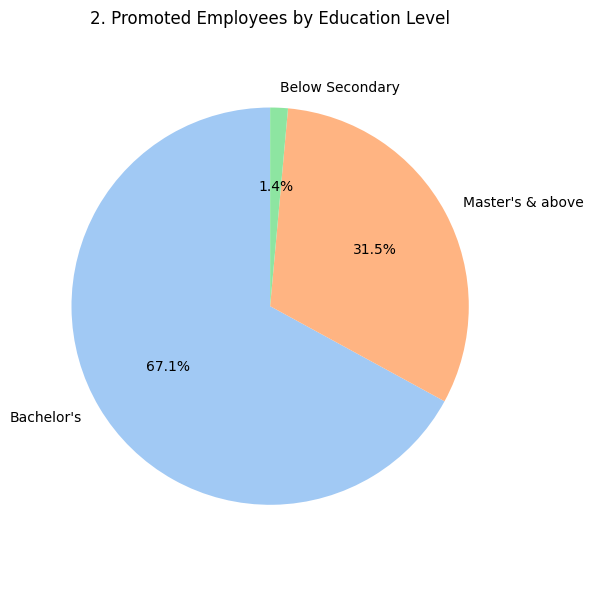

In [112]:
# Chart 2: Promotion Rate by Education Level
plt.figure(figsize=(6, 6))
edu_promoted = df[df['is_promoted'] == 1]['education'].value_counts()
plt.pie(edu_promoted, labels=edu_promoted.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

plt.title('2. Promoted Employees by Education Level')
plt.axis('equal')  # To make the pie chart a circle
plt.tight_layout()
plt.show()


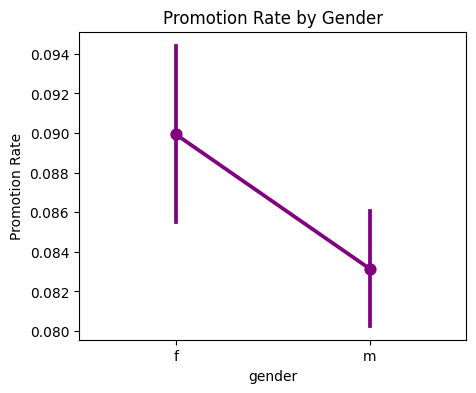

In [113]:
#3. Promotion Rate by Gender –  Point Plot
plt.figure(figsize=(5, 4))
sns.pointplot(data=df, x='gender', y='is_promoted', estimator='mean', color='purple')
plt.title('Promotion Rate by Gender')
plt.ylabel('Promotion Rate')
plt.show()


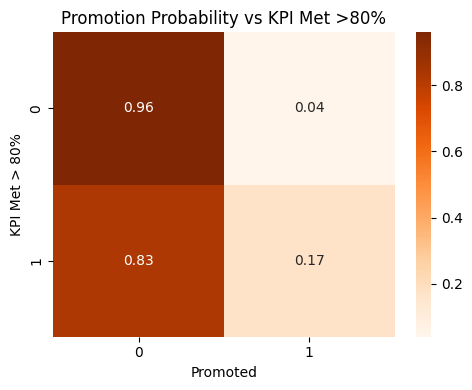

In [114]:
#4. Impact of KPIs Met (>80%) on Promotion –  Heatmap
kpi_crosstab = pd.crosstab(df['kpis_above_80'], df['is_promoted'], normalize='index')
plt.figure(figsize=(5, 4))
sns.heatmap(kpi_crosstab, annot=True, cmap='Oranges', fmt=".2f")
plt.title('Promotion Probability vs KPI Met >80%')
plt.xlabel('Promoted')
plt.ylabel('KPI Met > 80%')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_8848\1787575768.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='awards_won', y='is_promoted', palette='Reds')


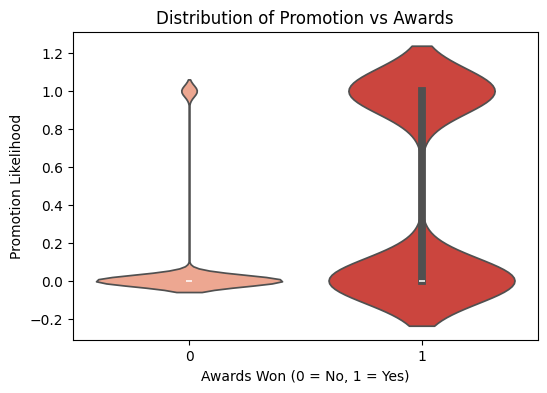

In [115]:
#5. Impact of Awards Won on Promotion – Violin Plot
plt.figure(figsize=(6, 4))
sns.violinplot(data=df, x='awards_won', y='is_promoted', palette='Reds')
plt.title('Distribution of Promotion vs Awards')
plt.xlabel('Awards Won (0 = No, 1 = Yes)')
plt.ylabel('Promotion Likelihood')
plt.show()


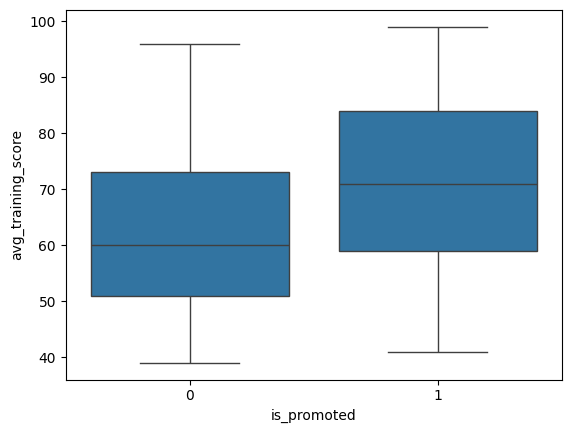

In [116]:
#6.Target vs numeric:
sns.boxplot(x='is_promoted', y='avg_training_score', data=df)
plt.show()



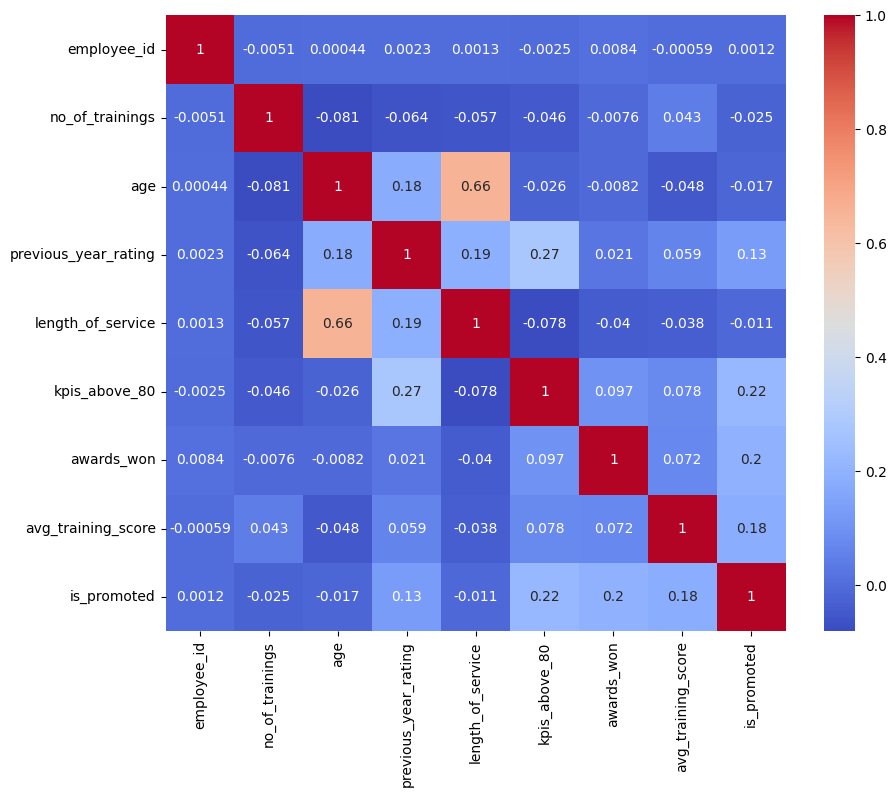

In [117]:
#Step 7: Correlation
plt.figure(figsize=(10, 8))  # Adjust width and height as needed
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()


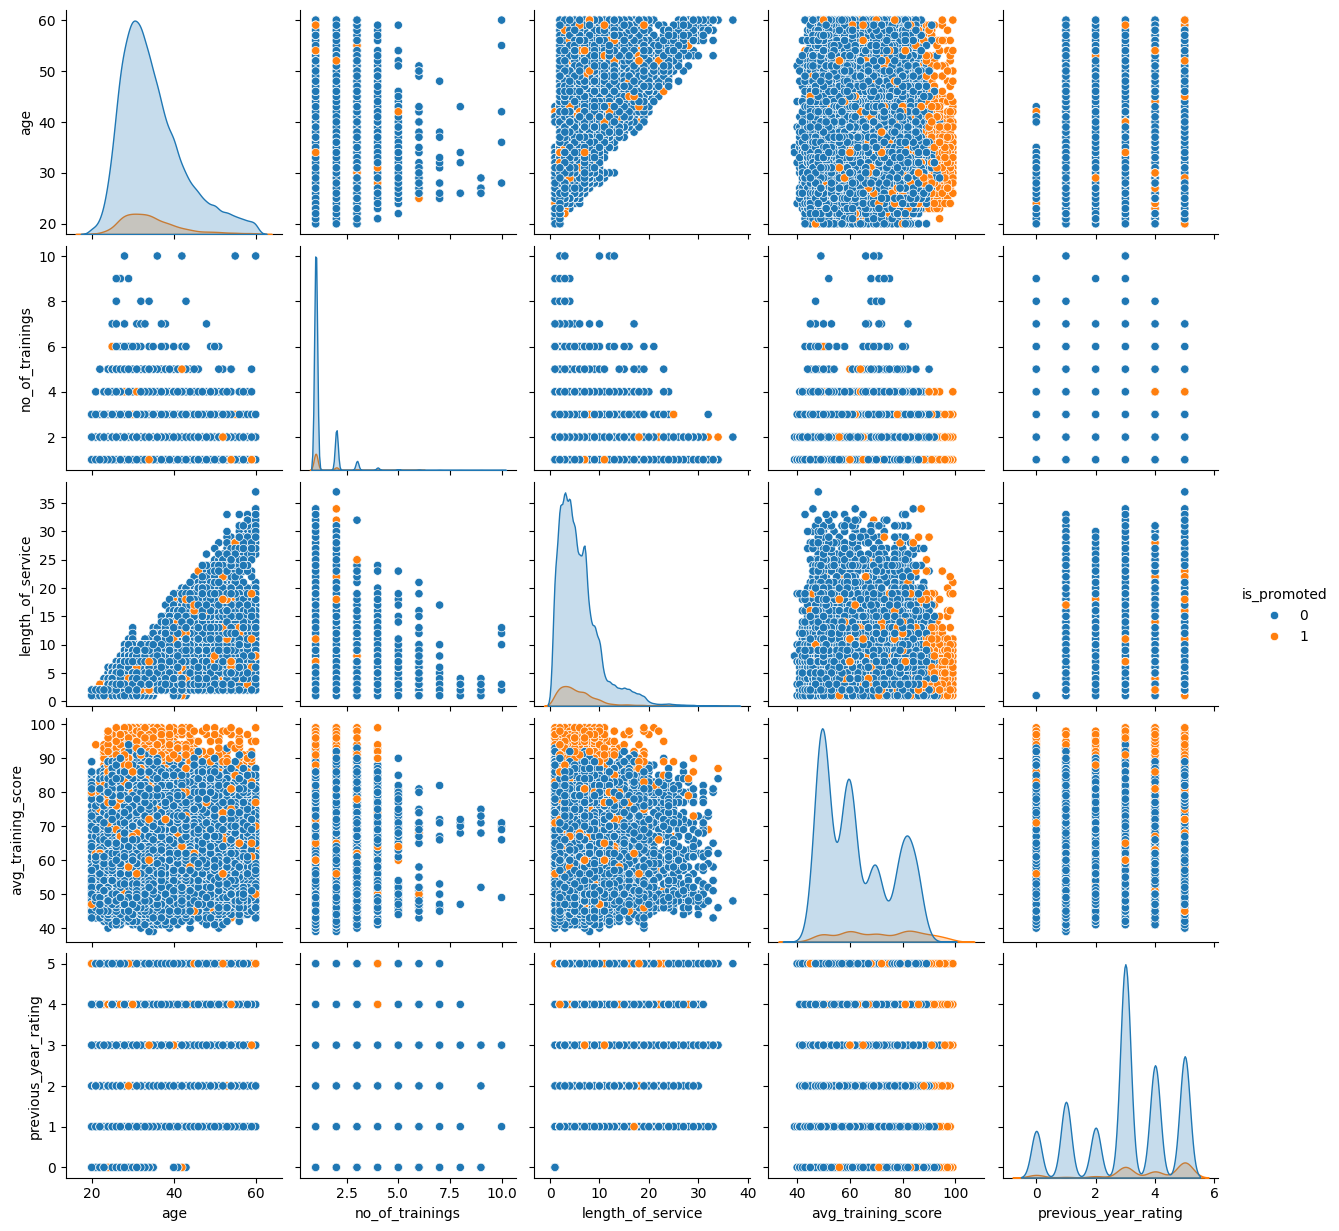

In [118]:
# Step 8: Feature Relationships
# Use pair plots or group comparisons:
sns.pairplot(df[numeric_cols + ['is_promoted']], hue='is_promoted')


In [119]:
# Promotion Rate
df['is_promoted'].mean()


np.float64(0.08517004816815063)

In [120]:
#5. Data Transformation

In [121]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,kpis_above_80,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [122]:
df1 = df.drop('employee_id', axis=1)
df1

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,kpis_above_80,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,0,45,0


In [123]:
#Encoding categorical variables
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = df1.copy()

# 1. Ordinal Encoding for education
edu_order = {
    "Below Secondary": 0,
    "Bachelor's": 1,
    "Master's & above": 2
}
df['education'] = df['education'].map(edu_order)

# 2. Binary Encoding for gender
df['gender'] = df['gender'].map({'m': 0, 'f': 1})

# 3. Label Encoding for region
le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])

# 4. One-Hot Encoding for department and recruitment_channel
df = pd.get_dummies(df, columns=['department', 'recruitment_channel'], drop_first=True)

# 5. Convert any True/False to 1/0
df_encoded = df.replace({True: 1, False: 0})

# Final encoded DataFrame
print(df_encoded.head(5))


C:\Users\user\AppData\Local\Temp\ipykernel_8848\247813970.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df.replace({True: 1, False: 0})


   region  education  gender  no_of_trainings  age  previous_year_rating  \
0      31          2       1                1   35                   5.0   
1      14          1       0                1   30                   5.0   
2      10          1       0                1   34                   3.0   
3      15          1       0                2   39                   1.0   
4      18          1       0                1   45                   3.0   

   length_of_service  kpis_above_80  awards_won  avg_training_score  ...  \
0                  8              1           0                  49  ...   
1                  4              0           0                  60  ...   
2                  7              0           0                  50  ...   
3                 10              0           0                  50  ...   
4                  2              0           0                  73  ...   

   department_Finance  department_HR  department_Legal  department_Operations  \
0    

In [124]:
df_encoded.head(5)

,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,kpis_above_80,awards_won,avg_training_score,...,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,recruitment_channel_referred,recruitment_channel_sourcing
0,31,2,1,1,35,5.0,8,1,0,49,...,0,0,0,0,0,0,1,0,0,1
1,14,1,0,1,30,5.0,4,0,0,60,...,0,0,0,1,0,0,0,0,0,0
2,10,1,0,1,34,3.0,7,0,0,50,...,0,0,0,0,0,0,1,0,0,1
3,15,1,0,2,39,1.0,10,0,0,50,...,0,0,0,0,0,0,1,0,0,0
4,18,1,0,1,45,3.0,2,0,0,73,...,0,0,0,0,0,0,0,1,0,0


In [125]:
#Normalization or scaling
cols_to_scale = ['age', 'previous_year_rating', 'length_of_service', 
                 'avg_training_score', 'no_of_trainings']
cols_to_scale

['age',
 'previous_year_rating',
 'length_of_service',
 'avg_training_score',
 'no_of_trainings']

In [126]:
#Apply Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])
print(df_encoded[cols_to_scale].head())


     age  previous_year_rating  length_of_service  avg_training_score  \
0  0.375                   1.0           0.194444            0.166667   
1  0.250                   1.0           0.083333            0.350000   
2  0.350                   0.6           0.166667            0.183333   
3  0.475                   0.2           0.250000            0.183333   
4  0.625                   0.6           0.027778            0.566667   

   no_of_trainings  
0         0.000000  
1         0.000000  
2         0.000000  
3         0.111111  
4         0.000000  


In [127]:
#6. Data Modeling — Step-by-Step

In [128]:
# 1. Define the Problem
# Decide what you're trying to predict.

# # Example: Predict if an employee will be promoted (is_promoted column).

In [129]:
X = df_encoded.drop('is_promoted', axis=1)
y = df_encoded['is_promoted']


In [130]:
X

,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,kpis_above_80,awards_won,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,recruitment_channel_referred,recruitment_channel_sourcing
0,31,2,1,0.000000,0.375,1.0,0.194444,1,0,0.166667,0,0,0,0,0,0,1,0,0,1
1,14,1,0,0.000000,0.250,1.0,0.083333,0,0,0.350000,0,0,0,1,0,0,0,0,0,0
2,10,1,0,0.000000,0.350,0.6,0.166667,0,0,0.183333,0,0,0,0,0,0,1,0,0,1
3,15,1,0,0.111111,0.475,0.2,0.250000,0,0,0.183333,0,0,0,0,0,0,1,0,0,0
4,18,1,0,0.000000,0.625,0.6,0.027778,0,0,0.566667,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,5,1,0,0.000000,0.700,0.6,0.444444,0,0,0.650000,0,0,0,0,0,0,0,1,0,1
54804,19,2,1,0.000000,0.425,0.4,0.138889,0,0,0.283333,0,0,0,1,0,0,0,0,0,0
54805,0,1,0,0.000000,0.175,1.0,0.055556,1,0,0.666667,0,0,0,0,0,0,0,0,0,0
54806,33,1,0,0.000000,0.225,0.2,0.027778,0,0,0.100000,0,0,0,0,0,0,1,0,0,1


In [131]:
y

0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54808, dtype: int64

In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [133]:
#3. Choose a Model
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [134]:
model.fit(X_train, y_train)


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [135]:
y_pred = model.predict(X_test)

In [136]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9317642765918628
Precision: 0.8669724770642202
Recall: 0.20814977973568283
Confusion Matrix:
 [[10025    29]
 [  719   189]]


In [137]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [138]:
# Predict
rf_preds = rf_model.predict(X_test)


In [139]:
# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))

Random Forest Accuracy: 0.9373289545703338
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     10054
           1       0.83      0.31      0.45       908

    accuracy                           0.94     10962
   macro avg       0.88      0.65      0.71     10962
weighted avg       0.93      0.94      0.92     10962

Confusion Matrix:
 [[9996   58]
 [ 629  279]]



Feature Importance:
                         Feature  Importance
0             avg_training_score    0.316084
1                            age    0.139923
2                         region    0.121625
3              length_of_service    0.103701
4           previous_year_rating    0.057136
5                  kpis_above_80    0.047747
6                     awards_won    0.029823
7   department_Sales & Marketing    0.026276
8   recruitment_channel_sourcing    0.025562
9                no_of_trainings    0.024297
10                        gender    0.022754
11         department_Operations    0.020532
12                     education    0.016287
13        department_Procurement    0.012706
14         department_Technology    0.010162
15            department_Finance    0.007661
16  recruitment_channel_referred    0.005987
17                 department_HR    0.004816
18                department_R&D    0.004151
19              department_Legal    0.002769


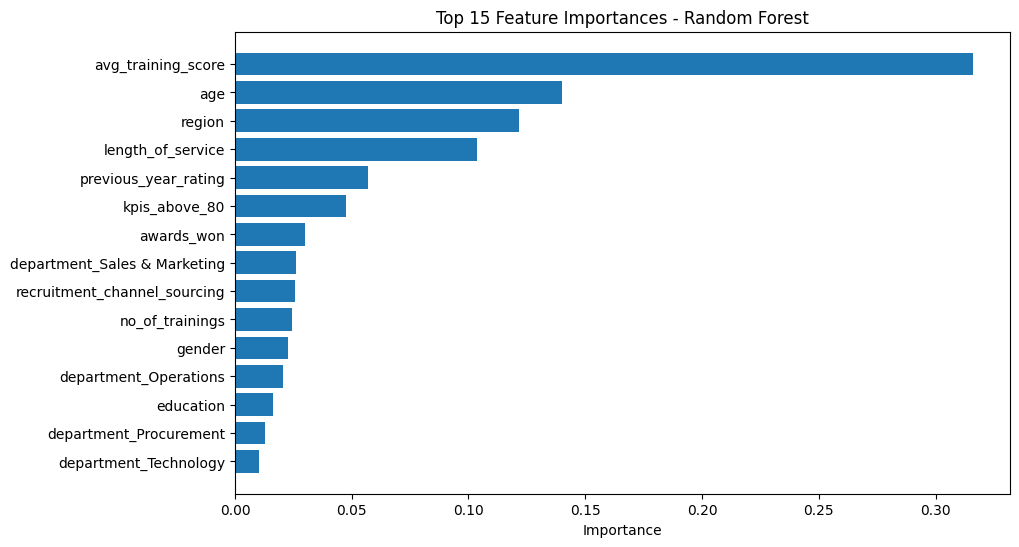

In [140]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance from the trained RF model
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Print table
print("\nFeature Importance:")
print(importance_df)

# Plot top 15 features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:15], importance_df['Importance'][:15])
plt.gca().invert_yaxis()  # Highest at top
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances - Random Forest')
plt.show()


In [141]:
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Train the model
# xgb_model = XGBClassifier(
#     use_label_encoder=False,
#     eval_metric='logloss',
#     random_state=42
# )
# xgb_model.fit(X_train, y_train)

# # Predictions
# y_pred = xgb_model.predict(X_test)

# # Evaluation
# print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [142]:
# from xgboost import plot_importance
# import pandas as pd
# import matplotlib.pyplot as plt

# # Get feature importance from the trained XGBoost model
# importance_dict = xgb_model.get_booster().get_score(importance_type='weight')

# # Convert to DataFrame
# importance_df = pd.DataFrame({
#     'Feature': list(importance_dict.keys()),
#     'Importance': list(importance_dict.values())
# }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# # Display as table
# print("\nFeature Importance (by weight):")
# print(importance_df)

# # Plot top 15 features
# plt.figure(figsize=(10, 6))
# plot_importance(xgb_model, importance_type='weight', max_num_features=15)
# plt.show()


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.inspection import permutation_importance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------------------
# ASSUMPTION: X (DataFrame or ndarray) and y (Series/array) are already defined
# Example:
# X = df.drop(columns=['is_promoted'])
# y = df['is_promoted'].astype(int)
# -----------------------------------------

# 1) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2) Define model with regularization + subsample + colsample_bytree
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=7,    # adjust for imbalance: tune this if needed
    max_depth=4,           # limit tree depth
    min_child_weight=3,    # require more data to split
    reg_alpha=0.5,         # L1 regularization (reduces single-feature dominance)
    reg_lambda=1.0,        # L2 regularization
    colsample_bytree=0.8,  # use subset of features per tree
    subsample=0.8,         # use subset of rows per tree
    n_estimators=200,
    verbosity=0
)

# 3) Fit model
xgb_model.fit(X_train, y_train)

# 4) Predictions
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

# 5) Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
import joblib

# Save the model as a .pkl file
joblib.dump(
    xgb_model,
    r"C:\Users\user\OneDrive\Desktop\HR PROJECT(29072025)\xgb_model.pkl"
)


In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance from the trained model
importance_dict = xgb_model.get_booster().get_score(importance_type='weight')

# Convert to DataFrame and sort
importance_df = pd.DataFrame({
    'Feature': importance_dict.keys(),
    'Importance': importance_dict.values()
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Print table
print("\nFeature Importance (by weight):")
print(importance_df)

# Plot top 15 features
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='weight', max_num_features=15)
plt.show()
